## Import libraries

In [30]:
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns

## Read and explore the data

In [4]:
data = pd.read_csv('../data/loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [55]:
data[' loan_status_encoded'] = data[' loan_status'].replace({' Approved':1,' Rejected':0})

### Filter those numerical and categorical columns

In [24]:
numerical_columns = [col for col in data.columns if data[col].dtypes != 'O']
categorical_columns = [col for col in data.columns if data[col].dtypes == 'O']

### Filter those ordinal and nominal features

In [28]:
ordinal_columns = [' education',' self_employed']

### Check the null values in each column

In [5]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### View the distribution of numerical columns

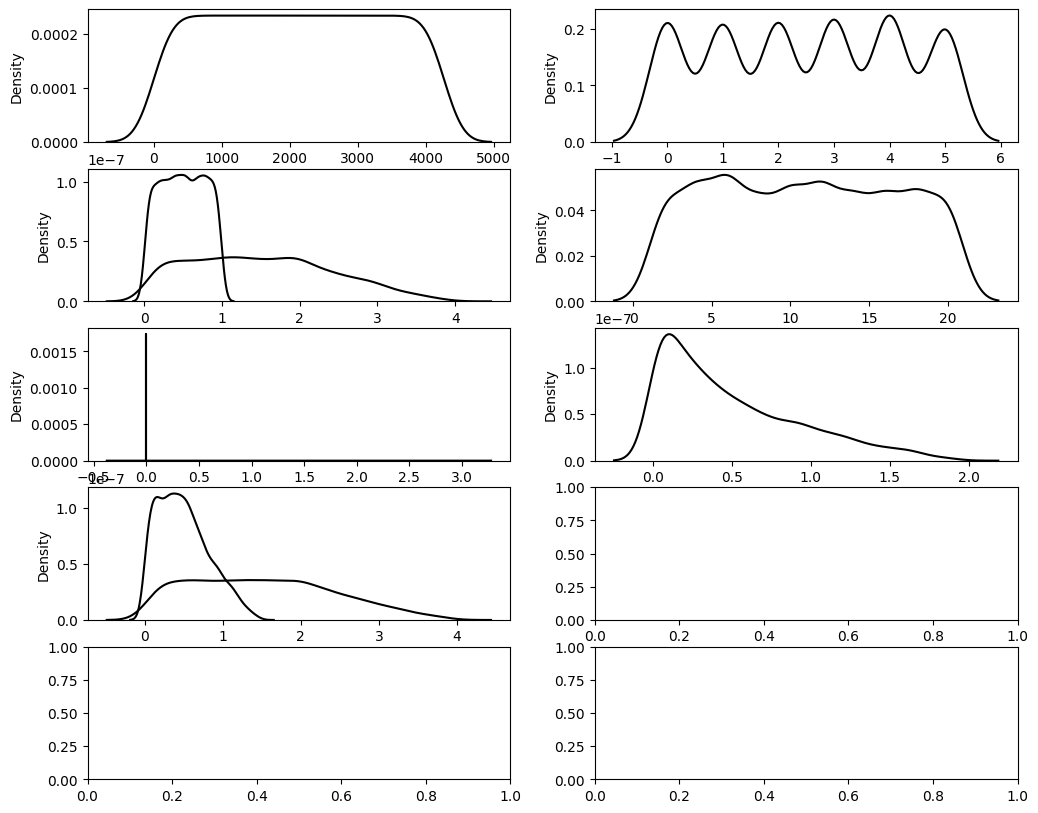

In [37]:
fig, axes = plt.subplots(5,2, figsize=(12,10))

row,col = 0,0
for i in numerical_columns:
    if col > 1:
        row+=1
        col = 0
        sns.kdeplot(ax=axes[row,col], data=data, x=data.loc[:,i], color='k')
    else:
        sns.kdeplot(ax=axes[row,col], data=data, x=data.loc[:,i], color='k')
        col+=1

### Distribution of categories in categorical column

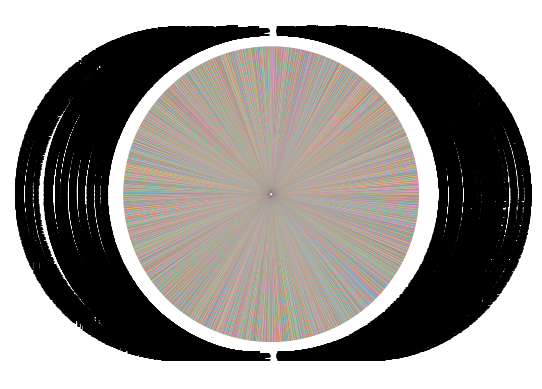

In [59]:
plt.pie(data[' loan_status_encoded'],labels=data[' education'])
plt.show()

' no_of_dependents'